In [322]:
import pandas as pd 
df = pd.read_pickle("test7.csv")
import matplotlib.pyplot as plt 



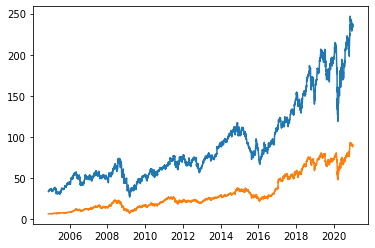

In [323]:
plt.plot(df.P1)
plt.plot(df.P2)

10000.0


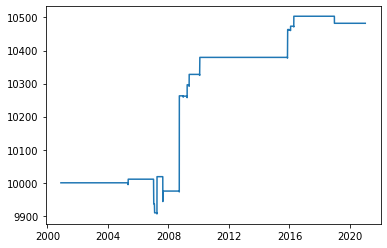

In [324]:
plt.plot(df.portfolio_value)
print(df.portfolio_value[0])

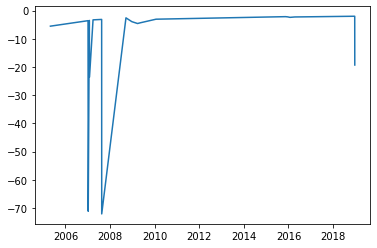

In [325]:
plt.plot(df.pnl.loc[df.pnl < 0])

In [291]:
df.pnl.loc[df.pnl < 0]

2004-11-19 21:00:00+00:00    -2.582500
2004-12-03 21:00:00+00:00    -2.567500
2004-12-10 21:00:00+00:00    -2.575001
2004-12-13 21:00:00+00:00   -12.595001
2004-12-16 21:00:00+00:00    -2.530000
2004-12-17 21:00:00+00:00   -22.700000
2004-12-31 21:00:00+00:00    -2.477501
2005-01-03 21:00:00+00:00   -30.306500
2005-01-05 21:00:00+00:00    -2.522500
2005-01-06 21:00:00+00:00   -14.083000
2005-01-07 21:00:00+00:00   -20.018001
2005-01-11 21:00:00+00:00    -2.507501
2005-01-12 21:00:00+00:00    -3.335500
2005-01-14 21:00:00+00:00    -2.552501
2005-01-18 21:00:00+00:00    -0.795501
2005-01-25 21:00:00+00:00    -2.590000
2005-01-26 21:00:00+00:00   -17.500000
2005-02-04 21:00:00+00:00    -2.500000
2005-02-14 21:00:00+00:00    -2.477500
2005-02-15 21:00:00+00:00   -32.652500
2005-02-16 21:00:00+00:00    -2.470001
2005-03-03 21:00:00+00:00    -2.402500
2005-03-04 21:00:00+00:00   -15.246500
2005-03-10 21:00:00+00:00    -2.380000
2005-03-11 21:00:00+00:00   -16.300001
2005-03-16 21:00:00+00:00

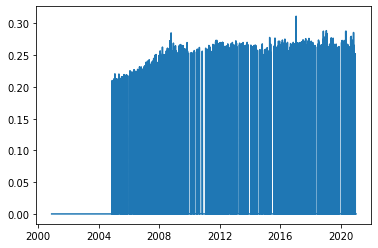

In [269]:
plt.plot(df.gross_leverage)

In [257]:
df.columns

Index(['P1', 'P2', 'algo_volatility', 'algorithm_period_return', 'alpha',
       'benchmark_period_return', 'benchmark_volatility', 'beta',
       'capital_used', 'ending_cash', 'ending_exposure', 'ending_value',
       'excess_return', 'gross_leverage', 'long_exposure', 'long_value',
       'longs_count', 'max_drawdown', 'max_leverage', 'net_leverage', 'orders',
       'period_close', 'period_label', 'period_open', 'pnl', 'portfolio_value',
       'positions', 'returns', 'sharpe', 'short_exposure', 'short_value',
       'shorts_count', 'sortino', 'starting_cash', 'starting_exposure',
       'starting_value', 'trading_days', 'transactions',
       'treasury_period_return'],
      dtype='object')

In [258]:
def plot(k):
    plt.plot(k)
    pass

In [227]:
df.portfolio_value[5000]

9621.25166517916

In [228]:
df.positions[4000]


[]

In [229]:
df.P1[4000]

27.7

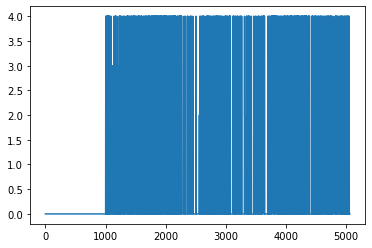

In [259]:
list_ =[len(i) for i in df.orders]
plot(list_)

In [271]:
df.iloc[-1,0]

233.44

In [318]:
import operator
def compare_array_with_float(arr, int_, relate):
    ops = {'>': operator.gt,
           '<': operator.lt}
    foo = True
    for i in arr:
        if not ops[relate](i,int_):
            foo = False
    return foo

x= [1,3]

compare_array_with_float(x,0,">")

True

In [311]:
1

1